# **Avoided Crossing in a One-Dimensional Asymmetric Quantum Well**

**Authors:** Dou Du, Taylor James Baird and Giovanni Pizzi 

<i class="fa fa-home fa-2x"></i><a href="../index.ipynb" style="font-size: 20px"> Go back to index</a>

**Source code:** https://github.com/osscar-org/quantum-mechanics/blob/master/notebook/quantum-mechanics/asymmetricwell.ipynb

In this notebook we demonstrate the phenomenon of avoided crossing by solving the Shrödinger
equation of a one-dimensional asymmetric quantum well.
<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

## **Goals**
  * Familiarize yourself with the phenomenon of avoided crossing.
  * Understand the mathematical origin of avoided crossing (i.e. how the behaviour arises from the description of a given system through a dependence on some set of parameters).
  * Relate the observation of avoided crossing in this toy model to its manifestation in realistic molecular and material systems.

## **Background theory**

[**More in the background theory.**](./theory/theory_asymmetricwell.ipynb)

## **Tasks and exercises**

1. For which value of $\mu$ are the two lowest eigenvalues closest to each other? Will the order of the states change by changing the $\mu$ parameter? And why?
    <details>
    <summary style="color: red">Solution</summary>
    <div style="border:blue; border-width:3px; border-style:outset;">

    In the figure, the blue and red lines show the lowest and 
    second-lowest eigenvalues respectively. The subplot on the bottom shows
    the two lowest eigenvalues as a function of the parameter $\mu$.
    One can see that these two eigenvalues are closest to each other
    at $\mu = 0$. For the entire range of plotted $\mu$ values, the red line is always higher
    than the blue line, i.e. the eigenvalues change continuously. However, the nature of the state changes as we change the value of mu! For values $\mu << 0$, the lowest eigenstate is localized in the right well, while for $\mu >>0$ is is localized in the left well. For values of $\mu$ close to zero, the two states mix and we get a symmetric and an antisymmetric solution. The $\mu x$ term can be considered as a perturbation to the original double well potential, which results in the avoided crossing. Please check the detailed
    information in the background theory section.
    </div>        
    </details>
    
2. How about other states? Is there any changing of energy order of the states?
    <details>
    <summary style="color: red">Solution</summary>
    <div style="border:blue; border-width:3px; border-style:outset;">
    By tuning the $\mu$ slider we observe that the values of the eigenvalues change continuously with the size of the perturbation. Also in this case, when the value of $\mu$ would tend to make two eigenvalues identical, an anticrossing effect takes place (e.g. between the second and third state at $\mu \sim 0.085$), and we see the appearance of a symmetric and an antisymmetric eigenstate.  
    </div>
    </details>
    
3. What type of molecular system could be described by the asymmetric double well model we consider here? 

    <details>
    <summary style="color: red">Solution</summary>
    <div style="border:blue; border-width:3px; border-style:outset;">

       As demonstrated in the <a href="../2quantumwells.ipynb">notebook</a>, illustrating a double quantum well system, this type of potential gives a reasonable description of diatomic molecules. Adding in asymmetry simply accounts for the two atoms comprising the molecule being different (a heteronuclear molecule). This toy model therefore illustrates the fact that, in diatomic systems, which are parameterized by a single value - namely the separation of the two nuclei - the eigenvalues of the system never cross. One must consider polyatomic molecules consisting of three or more atoms before crossing of electronic energy levels is observed (see <a href="https://en.wikipedia.org/wiki/Conical_intersection">Wikipedia</a>).
    </div>
    </details>


<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

## Interactive visualization
(be patient, it might take a few seconds to load)

In [70]:
%matplotlib widget

from numpy import linspace, sqrt, ones, arange, diag, argsort, zeros, concatenate
from scipy.linalg import eigh_tridiagonal
from ipywidgets import FloatSlider, jslink, VBox, HBox, Button, Label, RadioButtons
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from math import pi
from numpy import *

In [71]:
colors = ['b', 'r', 'g', 'c', 'm', 'y'] 

def potential(x, mu):
    """Potential function for double trough, mu: Parameter"""
    return x**4 - 0.6*x**2 + mu*x # asymmetrical double trough

def diagonalization(hquer, L, N, pot=potential, mu = 0.0):
    """Calculated sorted eigenvalues and eigenfunctions. 

       Input:
         hquer: Planck constant
         L: set viewed interval [-L,L] 
         N: number of grid points i.e. size of the matrix 
         pot: potential function of the form pot
         x0: center of the quantum well
         mu: potential function parameter 
       Ouput:
         ew: sorted eigenvalues (array of length N)
         ef: sorted eigenfunctions, ef[:,i] (size N*N)
         x:  grid points (arry of length N)
         dx: grid space
         V:  Potential at positions x (array of length N)
    """
    x = linspace(-L, L, N+2)[1:N+1]               # grid points 
    dx = x[1] - x[0]                              # grid spacing
    V = pot(x, mu)
    z = hquer**2 /2.0/dx**2                       
    h = (diag(V+2.0*z) + diag(-z*ones(N-1), -1)   
                      + diag(-z*ones(N-1), 1) )   #  Hamilton-Matrix

    ew, ef = eigh_tridiagonal(V+2.0*z, -z*ones(N-1))
    ew = ew.real                                  # real part of the eigenvalues
    ind = argsort(ew)                             # Indizes f. sort. Array
    ew = ew[ind]                                  # Sort the ew by ind
    ef = ef[:, ind]                               # Sort the columns
                                                
    ef = ef/sqrt(dx)                              # Correct standardization
    return ew, ef, x, dx, V


def plot_eigenfunctions(ax, ew, ef, x, V, width=1, Emax=0.2, fak= 2.0):
    """Plot der niedrigsten Eigenfunktionen 'ef' im Potential 'V(x)'
       auf Hoehe der Eigenwerte 'ew' in den Plotbereich 'ax'.
       
       Der optionale Parameter 'width' (mit Defaultwert 1)
       gibt die Linienstaerke beim Plot der Eigenfunktionen
       an. 'width' kann auch ein Array von Linienstaerken sein.
       'Emax' (mit Default-Wert V_0/10) legt die Energieobergrenze
       fuer den Plot fest.
       'fak' ist ein Skalierungsfaktor fuer die graphische Darstellung
       der Eigenfunktionen.
    """
    fak = fak/100.0; 

    ax.set_xlim([min(x), max(x)])
    ax.set_ylim([min(V)-0.01, ew[5]-0.02])
    ax2.set_ylim([min(V)-0.01, ew[5]-0.02])
    
    #ax[1].yaxis.set_label_position('right')
    #ax[1].yaxis.tick_right()
    ax.set_xticks([-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5])
    ax.set_xticklabels([-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5])
    ax.set_xlabel(r'$x/a$', fontsize = 10)
    ax.set_ylabel(r'$V(x)/V_0\ \rm{, Eigenfunctions}$', fontsize = 10)
      
    indmax = sum(ew<=Emax)                       
    
    if not hasattr(width, "__iter__"):           
        width = width*ones(indmax)               
    for i in arange(indmax):
        if psi_x.value == "Wavefunction":
            ax.plot(x, fak*(ef[:, i])+ew[i], linewidth=width[i]+.1, color=colors[i%len(colors)])
        else:
            ax.plot(x, fak*abs(ef[:, i])**2+ew[i], linewidth=width[i]+.1, color=colors[i%len(colors)])
        ax2.plot(x, x*0.0+ew[i], linewidth=width[i]+2.5, color=colors[i%len(colors)])
    
    ax.plot(x, V, c='k', linewidth=1.3)

/tmp/ipykernel_12270/2057605888.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8,6))


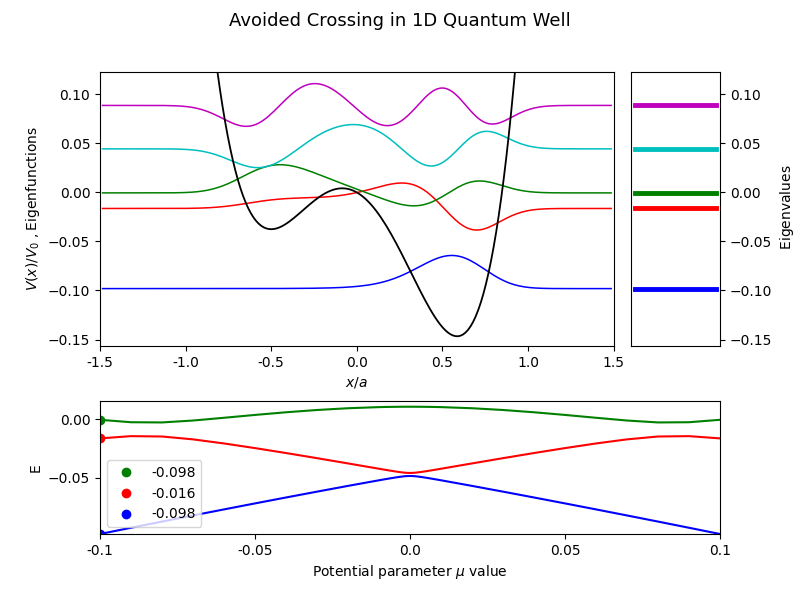

In [72]:
mu = -0.1                                            # Potential parameter
L = 1.5                                              # x Range [-L,L]
N = 200                                              # Number of grid points 
hquer = 0.06                                         # Planck constant
sigma_x = 0.1                                        # The width of the Guassian function
zeiten = linspace(0.0, 10.0, 400)                    # Time


smu = FloatSlider(value = -0.1, min = -0.1, max = 0.1, step = 0.01, description = r'$\mu$: ')
psi_x = RadioButtons(options=["Wavefunction", "Probability density"], value="Wavefunction", description="Show:")

fig = plt.figure(figsize=(8,6))
fig.canvas.header_visible = False

gs = GridSpec(10, 6, figure=fig)

ax1 = fig.add_subplot(gs[0:6, 0:5])
ax2 = fig.add_subplot(gs[0:6, 5])
ax3 = fig.add_subplot(gs[7:, :])

fig.suptitle('Avoided Crossing in 1D Quantum Well', fontsize = 13)

mu1 = []
ew1 = []
ew2 = []
ew3 = []


for i in concatenate((linspace(-0.1, -0.01, 10), linspace(-0.01, 0.01, 20), linspace(0.01, 0.1, 10))):
    ew, ef, x, dx, V = diagonalization(hquer, L, N, mu = i)
    mu1.append(i)
    ew1.append(ew[0])
    ew2.append(ew[1])
    ew3.append(ew[2])

ew, ef, x, dx, V = diagonalization(hquer, L, N, mu = mu)

ax3.plot(mu1, ew1, c='b')
ax3.plot(mu1, ew2, c='r')
ax3.plot(mu1, ew3, c='g')

s3 = ax3.plot(mu, ew[2], 'go', label = str(format(ew[0], '.3f')))
s2 = ax3.plot(mu, ew[1], 'ro', label = str(format(ew[1], '.3f')))
s1 = ax3.plot(mu, ew[0], 'bo', label = str(format(ew[0], '.3f')))

ax3.legend()

ax3.set_xlim([min(mu1), max(mu1)])
ax3.set_ylim([min(ew1), max(ew3)+0.005])

ax3.set_xlabel(r'Potential parameter $\mu$ value', fontsize = 10)
#ax3.set_ylabel(r'The values of the two lowest eigenvalues', fontsize = 10)
ax3.set_ylabel(r"E",fontsize = 10)
ax3.set_xticks([-0.1, -0.05, 0.0, 0.05, 0.1])
ax3.set_xticklabels([-0.1, -0.05, 0.0, 0.05, 0.1])

ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.get_xaxis().set_visible(False)
ax2.set_ylabel(r'$\rm{\ Eigenvalues}$', fontsize = 10)

plot_eigenfunctions(ax1, ew, ef, x, V)

plt.show()

sfak = FloatSlider(value = 2, min = 1.0, max = 5.0, step = 1.0, description = r'Zoom factor: ')

def on_mu_change(change):
    global ew, ef, x, dx, V
    ax1.clear()
    ax2.clear()
    
    try:
        ann.remove()
        ann1.remove()
    except:
        pass
    
    ew, ef, x, dx, V = diagonalization(hquer, L, N, mu = smu.value)
    plot_eigenfunctions(ax1, ew, ef, x, V, fak = sfak.value)


    for artist in (ax3.collections+ax3.lines):
        if isinstance(artist, plt.Line2D) and len(artist.get_xdata()) == 1:
            artist.remove()


    ax3.plot(smu.value, ew[0], 'bo', label = str(format(ew[0], '.3f')))
    ax3.plot(smu.value, ew[1], 'ro', label = str(format(ew[1], '.3f')))
    ax3.plot(smu.value, ew[2], 'go', label = str(format(ew[2], '.3f')))
    ax3.legend()
    
    for i in ax3.lines:
        i.set_alpha(1.0)

smu.observe(on_mu_change, names = 'value')
psi_x.observe(on_mu_change, names = 'value')

def on_press(event):
    global ann, ann1, ixx
    
    ixx = min(enumerate(ew), key = lambda x: abs(x[1]-event.ydata))[0]
    
    for i in range(len(ax2.lines)):
        ax1.lines[i].set_alpha(0.1)
        ax2.lines[i].set_alpha(0.1)
        ax1.lines[i].set_linewidth(1.1)
        
    ax1.lines[ixx].set_alpha(1.0)
    ax2.lines[ixx].set_alpha(1.0)
    ax1.lines[ixx].set_linewidth(2.0)
    
    for i in range(3):
        if i == ixx:
            ax3.lines[i].set_alpha(1.0)
        else:
            ax3.lines[i].set_alpha(0.1)
    
    try:
        ann.remove()
        ann1.remove()
    except:
        pass
    
    ann = ax1.annotate(s = 'n = ' + str(ixx+1), xy = (0, ew[ixx]), xytext = (-0.15, ew[ixx]), xycoords = 'data', color='k', size=15)
    ann1 = ax2.annotate(s = str("{:.3f}".format(ew[ixx])), xy = (0, ew[ixx]), xytext = (-1.2, ew[ixx]+0.005), xycoords = 'data', color='k', size=11)

cid = fig.canvas.mpl_connect('button_press_event', on_press)
    
def on_xfak_change(change):
    ax1.clear()
    ax2.clear()
    plot_eigenfunctions(ax1, ew, ef, x, V, fak = sfak.value)

sfak.observe(on_xfak_change, names = 'value')

def on_update_click(b):
    for i in ax1.lines:
        i.set_alpha(1.0)
        i.set_linewidth(1.1)
    
    for i in ax2.lines:
        i.set_alpha(1.0)
        
    for i in ax3.lines:
        i.set_alpha(1.0)
        
    try:
        ann.remove()
        ann1.remove()
    except:
        pass
    

update = Button(description="Show all")
update.on_click(on_update_click)

label1 = Label(value="(click on a state to select it)");

display(HBox([smu, sfak]), HBox([psi_x, update, label1]))

* **$\mu$:** the potential parameter determining the symmetry of the double well potential.
* **Zoom factor:** the zoom factor of the eigenfunctions. 

<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

# Legend

(How to use the interactive visualization)

## Interactive figures 

There are two subplots shown above. In the uppermost subplot, the wide figure on the left shows 
the well potential alongside the eigenfunctions, $\psi$, of different states (or their corresponding probability density, the square modulus $|\psi|^2$). The narrow figure on the right shows 
the corresponding eigenvalues. 

The subplot on the bottom shows how the three lowest eigenvalues change with the modification of the potential parameter, $\mu$.


## Controls

There is a slider to adjust the $\mu$ parameter of the potential.
The zoom factor slider aids in the inspection of the wavefunctions by
multiplying them by a constant (this is purely for visualization purposes). One can highlight the square modulus of a specific eigenfunction, $\psi$, and its
eigenvalue, by clicking on the plot. All the other 
states shall be hidden from the plot. By clicking the `Show all` button, one can 
see all states again if they were previously hidden by clicking on one of them to highlight it. Additionally, there is a radio button which enables one to choose whether to plot the wavefunctions $\psi$, or the probability densities $|\psi|^2$.